<a href="https://colab.research.google.com/github/YuvalRozner/BetterWeather/blob/main/Data_Manipulations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [ ]:
df = pd.read_csv('/content/data2023Eilat.csv')

<ipython-input-82-c27e36376c5a>:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/data2023Eilat.csv')


In [ ]:
# Slice [start:stop:step], starting from index 5 take every 6th record.
df = df[::6]
df = df.drop(columns=['NIP (w/m^2)'])
df = df.drop(columns=['DiffR (w/m^2)'])
df = df.drop(columns=['Grad (w/m^2)'])

date_time = pd.to_datetime(df.pop('Date Time'), format='%d-%m-%y %H:%M')

df = df.apply(pd.to_numeric, errors='coerce')

df.head()

,BP (hPa),RH (%),TD (degC),TDmax (degC),TDmin (degC),WD (deg),WDmax (deg),WS (m/s),Ws1mm (m/s),Ws10mm (m/s),WSmax (m/s),STDwd (deg)
0,1011.8,20.0,26.8,26.9,26.8,3.0,24.0,1.2,1.9,1.3,3.5,25.5
6,1011.5,25.0,25.6,25.8,25.4,30.0,29.0,2.8,4.1,3.3,6.0,18.0
12,1011.5,29.0,24.1,24.2,24.0,19.0,35.0,2.7,4.0,3.2,6.3,21.9
18,1011.4,23.0,23.9,24.0,23.8,1.0,8.0,1.3,2.4,2.0,4.6,28.4
24,1011.7,22.0,22.5,22.6,22.3,41.0,341.0,1.6,2.5,1.6,4.0,39.0


In [ ]:
mpl.rcParams['figure.figsize'] = (14, 40)
mpl.rcParams['axes.grid'] = False

In [ ]:
#plot_cols = ['WD (deg)', 'TD (degC)']
plot_cols = df.columns
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

plot_features = df[plot_cols][:480]
plot_features.index = date_time[:480]
_ = plot_features.plot(subplots=True)

In [ ]:
df.describe().transpose()

,count,unique,top,freq
BP (hPa),10247,600,1007,73
Grad (w/m^2),10247,1030,0,4969
RH (%),10247,88,35,273
TD (degC),10247,386,28.5,76
TDmax (degC),10247,390,28,67
TDmin (degC),10247,390,28.4,72
WD (deg),10247,356,32,277
WDmax (deg),10247,357,30,201
WS (m/s),10247,67,2.5,352
Ws1mm (m/s),10247,93,3.8,248


In [ ]:
mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

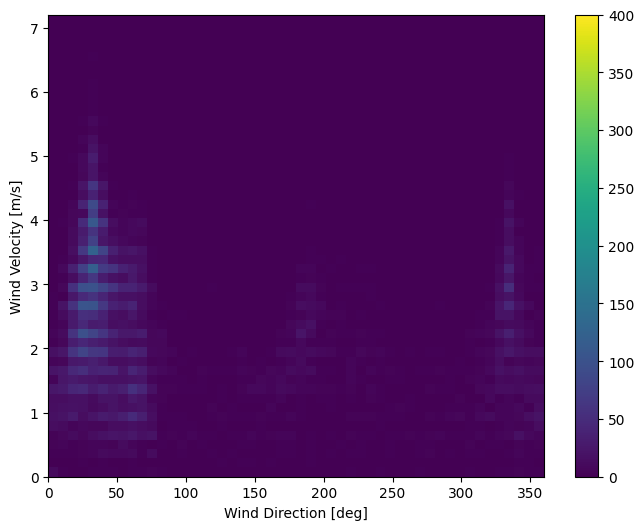

In [ ]:
# Use boolean indexing to filter out NaN values for plotting
mask = ~np.isnan(df['WD (deg)']) & ~np.isnan(df['WS (m/s)'])

# Create the 2D histogram plot
plt.hist2d(df['WD (deg)'][mask], df['WS (m/s)'][mask], bins=(50, 50), vmax=400)
plt.colorbar()
plt.xlabel('Wind Direction [deg]')
plt.ylabel('Wind Velocity [m/s]')
plt.show()

In [ ]:
print(df.columns)


Index(['BP (hPa)', 'RH (%)', 'TD (degC)', 'TDmax (degC)', 'TDmin (degC)',
       'WD (deg)', 'WDmax (deg) ', 'Ws1mm (m/s)', 'Ws10mm (m/s)',
       'WSmax (m/s) ', 'STDwd (deg)'],
      dtype='object')


In [ ]:
ws = df.pop('WS (m/s)')
max_ws = df.pop('WSmax (m/s) ')

# Convert to radians.
wd_rad = df.pop('WD (deg)')*np.pi / 180

# Calculate the wind x and y components.
df['Wx'] = ws*np.cos(wd_rad)
df['Wy'] = ws*np.sin(wd_rad)

# Calculate the max wind x and y components.
df['max Wx'] = max_ws*np.cos(wd_rad)
df['max Wy'] = max_ws*np.sin(wd_rad)

(-5.673256084256073, 6.105946292326267, -2.96698833461372, 4.350277377775919)

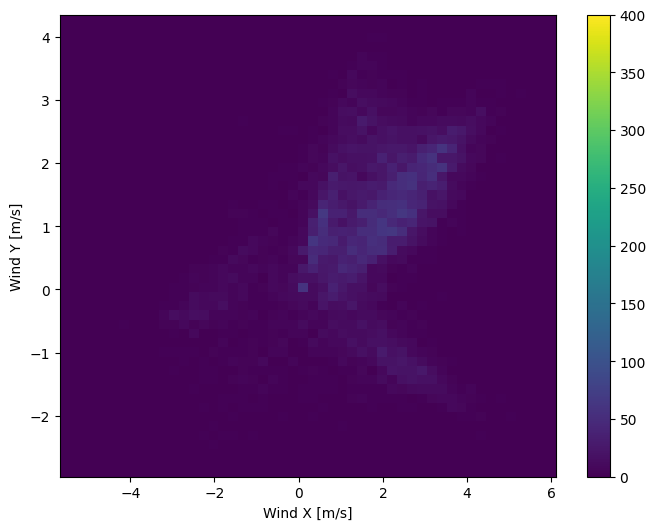

In [ ]:
# Use boolean indexing to filter out NaN values for plotting
mask = ~np.isnan(df['Wx']) & ~np.isnan(df['Wy'])

plt.hist2d(df['Wx'][mask], df['Wy'][mask], bins=(50, 50), vmax=400)
plt.colorbar()
plt.xlabel('Wind X [m/s]')
plt.ylabel('Wind Y [m/s]')
ax = plt.gca()
ax.axis('tight')